In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


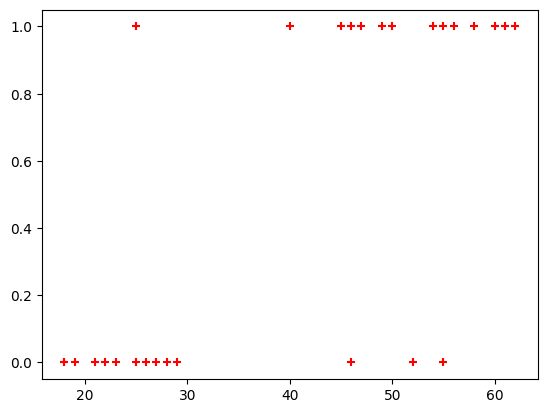

In [3]:
plt.scatter(df.age,df.bought_insurance,marker="+",color = "red")

In [4]:
df.shape

(28, 3)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test,y_train, y_test = train_test_split(df[['age']],df.bought_insurance, test_size=0.9)

In [7]:
X_test

,age
3,52
22,40
12,27
7,60
8,62
23,45
6,55
25,54
15,55
21,26


In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
model = LogisticRegression()

In [10]:
from sklearn.utils import resample

df_majority = df[df['bought_insurance'] == 0]
df_minority = df[df['bought_insurance'] == 1]

df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

X_train, X_test, y_train, y_test = train_test_split(df_upsampled[['age']], df_upsampled['bought_insurance'], test_size=0.9)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [11]:
model.predict(X_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0])

In [12]:
print("Model score:", model.score(X_test, y_test))

Model score: 0.8846153846153846


In [13]:
model.predict_proba(X_test)

array([[0.98793433, 0.01206567],
       [0.43911871, 0.56088129],
       [0.03986495, 0.96013505],
       [0.15275456, 0.84724544],
       [0.43911871, 0.56088129],
       [0.01953564, 0.98046436],
       [0.01953564, 0.98046436],
       [0.06344091, 0.93655909],
       [0.01535981, 0.98464019],
       [0.00947109, 0.99052891],
       [0.99256966, 0.00743034],
       [0.96013481, 0.03986519],
       [0.07963129, 0.92036871],
       [0.96851665, 0.03148335],
       [0.98046424, 0.01953576],
       [0.07963129, 0.92036871],
       [0.07963129, 0.92036871],
       [0.43911871, 0.56088129],
       [0.01953564, 0.98046436],
       [0.00357952, 0.99642048],
       [0.06344091, 0.93655909],
       [0.9941733 , 0.0058267 ],
       [0.92036825, 0.07963175],
       [0.94963752, 0.05036248],
       [0.9846401 , 0.0153599 ],
       [0.93655872, 0.06344128]])

In [16]:
model.predict([[60]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])